# 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Mimo: Learn to Code** di Google Play Store. 

## 🔧 **Libraries Used**

In [1]:
from google_play_scraper import reviews, Sort, app

# Data & Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP dan Preprocessing
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import contractions
import re
import unicodedata
import spacy

# Model dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# WordCloud
from wordcloud import WordCloud

# Utility
from collections import Counter

## 🏁 **Tahapan Proyek**  

### 1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [2]:
info = app('com.getmimo')  # ID aplikasi Mimo
print("Versi terbaru:", info['version'])

Versi terbaru: 6.4


In [3]:
# Ambil 1000 review terbaru
result, _ = reviews(
    'com.getmimo',
    lang='en',
    count=1000,
    sort=Sort.NEWEST
)

# Simpan ke dalam variabel filtered_reviews agar tetap kompatibel
filtered_reviews = result

In [4]:
# Simpan hasil filter ke dalam DataFrame
df = pd.DataFrame(filtered_reviews)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f21c804c-c171-45c8-b8ad-4015c87403de,Asemota Precious,https://play-lh.googleusercontent.com/a-/ALV-U...,being using mimo for quite a while now and all...,3,0,6.3,2025-06-17 00:27:15,None,NaT,6.3
1,4e09ffba-c5a4-4f24-aaba-496ea10cd251,SuRyA DeV,https://play-lh.googleusercontent.com/a-/ALV-U...,nice aap,5,0,6.3,2025-06-16 23:27:36,None,NaT,6.3
2,6da7b710-07cf-42dd-b477-3e730aea1019,Arul Raj,https://play-lh.googleusercontent.com/a-/ALV-U...,It is very useful app I ever used,5,0,6.4,2025-06-16 23:26:42,None,NaT,6.4
3,b6bd0cf6-8769-43df-85bb-eba3f5129ff8,Nyashadzashe Mudzimurega,https://play-lh.googleusercontent.com/a/ACg8oc...,Mimo is excellent💯,5,0,6.3,2025-06-16 22:20:46,None,NaT,6.3
4,321d5314-dbc9-4ec8-a9aa-51cb41d53ec9,Anuwar Zinab,https://play-lh.googleusercontent.com/a-/ALV-U...,it is useful application,5,0,6.3,2025-06-16 22:04:30,None,NaT,6.3
...,...,...,...,...,...,...,...,...,...,...,...
995,1d55f1f1-cdfb-4632-888c-22af71c0fb41,Jonathan Driver,https://play-lh.googleusercontent.com/a-/ALV-U...,It's p good,5,0,6.3,2025-05-08 15:30:55,None,NaT,6.3
996,be1ffa30-9b53-4a0c-9429-82c3852138d6,Shawn Walker,https://play-lh.googleusercontent.com/a/ACg8oc...,Straight forward and great pacing.,5,0,6.3,2025-05-08 15:16:08,None,NaT,6.3
997,2ceed7fd-4293-4b48-8e11-a31934049f9d,Alex Tindle,https://play-lh.googleusercontent.com/a-/ALV-U...,literally love this app ✌️✌️,5,0,6.3,2025-05-08 14:54:11,None,NaT,6.3
998,05795e0e-6571-45d9-aae2-37c54b2d433d,Ruud Fusha,https://play-lh.googleusercontent.com/a/ACg8oc...,enjoying Mimo - makes it easy to learn on the go.,5,0,6.3,2025-05-08 14:37:06,None,NaT,6.3


In [5]:
output_path = "../data/review_mimo.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_mimo.xlsx


In [6]:
# # Import data
# file_path = "../data/review_mimo.xlsx"
# df = pd.read_excel(file_path)
# df.head()

In [7]:
df2 = df[['content', 'score']].copy()
df2

,content,score
0,being using mimo for quite a while now and all...,3
1,nice aap,5
2,It is very useful app I ever used,5
3,Mimo is excellent💯,5
4,it is useful application,5
...,...,...
995,It's p good,5
996,Straight forward and great pacing.,5
997,literally love this app ✌️✌️,5
998,enjoying Mimo - makes it easy to learn on the go.,5


### 2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [8]:
# Melihat jumlah rating ulasan App
df2['score'].value_counts()

score
5    749
4    160
1     38
3     36
2     17
Name: count, dtype: int64

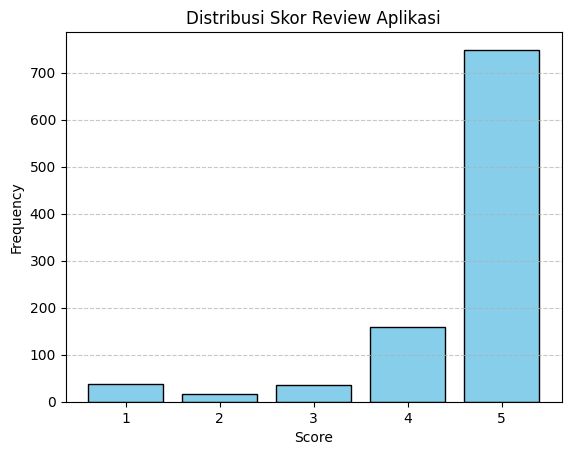

In [9]:
# Histogram skor 1–5
plt.hist(df2['score'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])  # Skor tetap integer
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review Aplikasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Rangkuman statistik
df2.describe().loc[:, ['score']]

,score
count,1000.000000
mean,4.565000
std,0.936297
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='at'>

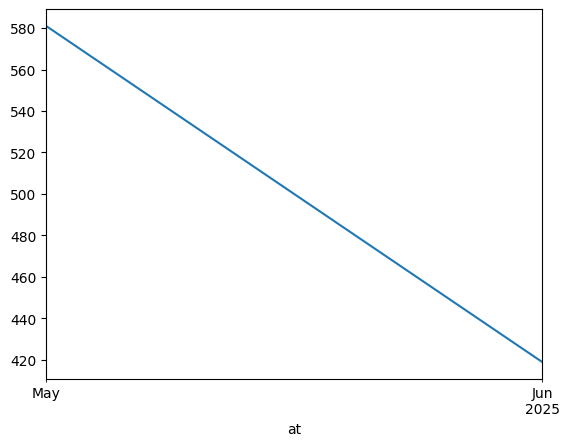

In [11]:
# Grafik jumlah review per bulan.
df['at'] = pd.to_datetime(df['at'])  # Pastikan format datetime
df.set_index('at').resample('ME').count()['reviewId'].plot()


### 3️⃣ **Tahapan Preprocessing**

In [12]:
# ✅ 1. Handling Missing Values → Menghapus atau mengisi data yang kosong  
print(df2.isnull().sum())

content    0
score      0
dtype: int64


In [13]:
# ✅ 2. Lowercasing → Mengubah seluruh teks menjadi huruf kecil  
df2['content_clean'] = df2['content'].astype(str).str.lower()
df2.head(5)

,content,score,content_clean
0,being using mimo for quite a while now and all...,3,being using mimo for quite a while now and all...
1,nice aap,5,nice aap
2,It is very useful app I ever used,5,it is very useful app i ever used
3,Mimo is excellent💯,5,mimo is excellent💯
4,it is useful application,5,it is useful application


In [14]:
# ✅ 3. Expand Contraction → Mengubah bentuk singkatan menjadi bentuk lengkap (e.g., don't → do not)  
df2['content_clean'] = df2['content_clean'].apply(lambda x: contractions.fix(x))
df2.head(5)

,content,score,content_clean
0,being using mimo for quite a while now and all...,3,being using mimo for quite a while now and all...
1,nice aap,5,nice aap
2,It is very useful app I ever used,5,it is very useful app i ever used
3,Mimo is excellent💯,5,mimo is excellent💯
4,it is useful application,5,it is useful application


In [15]:
# ✅ 4. Tokenisasi → Memisahkan teks menjadi daftar kata

# Inisialisasi tokenizer Treebank
tokenizer = TreebankWordTokenizer()

# Terapkan tokenisasi
df2['tokens'] = df2['content_clean'].apply(lambda x: tokenizer.tokenize(x))
df2.head(5)


,content,score,content_clean,tokens
0,being using mimo for quite a while now and all...,3,being using mimo for quite a while now and all...,"[being, using, mimo, for, quite, a, while, now..."
1,nice aap,5,nice aap,"[nice, aap]"
2,It is very useful app I ever used,5,it is very useful app i ever used,"[it, is, very, useful, app, i, ever, used]"
3,Mimo is excellent💯,5,mimo is excellent💯,"[mimo, is, excellent💯]"
4,it is useful application,5,it is useful application,"[it, is, useful, application]"


In [16]:
# ✅ 5. Cabang token untuk VADER 
df2['tokens_vader'] = df2['tokens']

In [17]:
# Stopwords bawaan + custom domain-specific
stop_words = set(stopwords.words('english'))

# Tambahkan custom stopwords domain Play Store
custom_words = {
    'app', 'apps', 'application', 'play', 'store', 'installed', 'install',
    'downloading', 'download', 'device', 'phone', 'mobile', 'using', 'used',
    'google', 'work', 'mimo', 'hub', 'sphero', 'edu','sololearn','codecademy','go','working'  # opsional tergantung fokus topik
}
stop_words.update(custom_words)

# Terapkan stopword removal ke token yang sudah bebas tanda baca
df2['tokens_clean'] = df2['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])


In [18]:
def normalize_token(token):
    # Hapus spasi, simbol, dan karakter unicode aneh
    token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
    return token.strip()  # Hapus spasi atau newline

def is_alpha(token):
    return token.isalpha()

df2['tokens_clean'] = df2['tokens_clean'].apply(lambda tokens: [
    normalize_token(t).lower()
    for t in tokens
    if is_alpha(normalize_token(t).strip())
])

df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean
0,being using mimo for quite a while now and all...,3,being using mimo for quite a while now and all...,"[being, using, mimo, for, quite, a, while, now...","[being, using, mimo, for, quite, a, while, now...","[quite, sudden, assess, tried, opening, days, ..."
1,nice aap,5,nice aap,"[nice, aap]","[nice, aap]","[nice, aap]"
2,It is very useful app I ever used,5,it is very useful app i ever used,"[it, is, very, useful, app, i, ever, used]","[it, is, very, useful, app, i, ever, used]","[useful, ever]"
3,Mimo is excellent💯,5,mimo is excellent💯,"[mimo, is, excellent💯]","[mimo, is, excellent💯]",[excellent]
4,it is useful application,5,it is useful application,"[it, is, useful, application]","[it, is, useful, application]",[useful]


In [19]:
# Cek baris mana saja yang mengandung token 'nice' sebelum dibersihkan
df2[df2['tokens'].apply(lambda tokens: 'nice' in tokens)]


,content,score,content_clean,tokens,tokens_vader,tokens_clean
1,nice aap,5,nice aap,"[nice, aap]","[nice, aap]","[nice, aap]"
8,nice,5,nice,[nice],[nice],[nice]
20,A very nice app that explains with simple term...,5,a very nice app that explains with simple term...,"[a, very, nice, app, that, explains, with, sim...","[a, very, nice, app, that, explains, with, sim...","[nice, explains, simple, terms, skip, problem,..."
23,nice app,5,nice app,"[nice, app]","[nice, app]",[nice]
45,very nice smooth and fast easier for beginners,5,very nice smooth and fast easier for beginners,"[very, nice, smooth, and, fast, easier, for, b...","[very, nice, smooth, and, fast, easier, for, b...","[nice, smooth, fast, easier, beginners]"
...,...,...,...,...,...,...
901,App is very nice but I would love to see a fea...,4,app is very nice but i would love to see a fea...,"[app, is, very, nice, but, i, would, love, to,...","[app, is, very, nice, but, i, would, love, to,...","[nice, would, love, see, feature, could, pract..."
909,nice app to start coding,5,nice app to start coding,"[nice, app, to, start, coding]","[nice, app, to, start, coding]","[nice, start, coding]"
942,nice,5,nice,[nice],[nice],[nice]
958,I like this app very nice 👌🏻,5,i like this app very nice 👌🏻,"[i, like, this, app, very, nice, 👌🏻]","[i, like, this, app, very, nice, 👌🏻]","[like, nice]"


In [20]:
#✅ 8. Lemmatization
# Load model spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi lemmatizer menggunakan spaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Gabungkan token ke dalam satu string untuk diproses
    return [token.lemma_ for token in doc]

# Lemmatisasi kolom 'tokens_clean'
df2['tokens_clean_lemma'] = df2['tokens_clean'].apply(lemmatize_tokens)
df2.head(5)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma
0,being using mimo for quite a while now and all...,3,being using mimo for quite a while now and all...,"[being, using, mimo, for, quite, a, while, now...","[being, using, mimo, for, quite, a, while, now...","[quite, sudden, assess, tried, opening, days, ...","[quite, sudden, assess, try, opening, day, ago..."
1,nice aap,5,nice aap,"[nice, aap]","[nice, aap]","[nice, aap]","[nice, aap]"
2,It is very useful app I ever used,5,it is very useful app i ever used,"[it, is, very, useful, app, i, ever, used]","[it, is, very, useful, app, i, ever, used]","[useful, ever]","[useful, ever]"
3,Mimo is excellent💯,5,mimo is excellent💯,"[mimo, is, excellent💯]","[mimo, is, excellent💯]",[excellent],[excellent]
4,it is useful application,5,it is useful application,"[it, is, useful, application]","[it, is, useful, application]",[useful],[useful]


In [21]:
#✅ 9. Removing Rare Words (frekuensi < 3)

# Gabungkan semua token dari seluruh review menjadi satu list
all_clean_lemmas = [token for tokens in df2['tokens_clean_lemma'] for token in tokens]

# Hitung frekuensi kata
token_freq = Counter(all_clean_lemmas)

# Ambil kata-kata yang muncul ≥ 3 kali
min_freq = 3
valid_tokens = set([token for token, freq in token_freq.items() if freq >= min_freq])

# Hapus token yang tidak termasuk dalam set valid_tokens
df2['tokens_clean_final'] = df2['tokens_clean_lemma'].apply(lambda tokens: [t for t in tokens if t in valid_tokens])
df2.head()


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma,tokens_clean_final
0,being using mimo for quite a while now and all...,3,being using mimo for quite a while now and all...,"[being, using, mimo, for, quite, a, while, now...","[being, using, mimo, for, quite, a, while, now...","[quite, sudden, assess, tried, opening, days, ...","[quite, sudden, assess, try, opening, day, ago...","[quite, try, day, really]"
1,nice aap,5,nice aap,"[nice, aap]","[nice, aap]","[nice, aap]","[nice, aap]","[nice, aap]"
2,It is very useful app I ever used,5,it is very useful app i ever used,"[it, is, very, useful, app, i, ever, used]","[it, is, very, useful, app, i, ever, used]","[useful, ever]","[useful, ever]","[useful, ever]"
3,Mimo is excellent💯,5,mimo is excellent💯,"[mimo, is, excellent💯]","[mimo, is, excellent💯]",[excellent],[excellent],[excellent]
4,it is useful application,5,it is useful application,"[it, is, useful, application]","[it, is, useful, application]",[useful],[useful],[useful]


In [22]:
# ✅ 10. Handling Missing Values → Menghapus data yang kosong 

print("Jumlah baris SEBELUM pembersihan:", len(df2))

# Hapus baris jika kolom 'tokens' kosong (NaN atau [])
df2 = df2[~df2['tokens_clean_final'].isnull()]                            # Hapus jika NaN
df2 = df2[df2['tokens_clean_final'].apply(lambda x: len(x) > 0)]          # Hapus jika list kosong []

# Reset index agar rapi (opsional)
df2 = df2.reset_index(drop=True)

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris SESUDAH pembersihan:", len(df2))

Jumlah baris SEBELUM pembersihan: 1000
Jumlah baris SESUDAH pembersihan: 970


### 4️⃣ **Cek Sentiment Analysis - Textblob**

In [23]:
# Hitung sentimen dengan aman menggunakan .loc
df2.loc[:, 'sentiment_polarity'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df2.loc[:, 'sentiment_subjective'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [24]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df2['sentiment_rating'] = df2['score'].apply(lambda x: 'positive' if x > 3 else('neutral' if x == 3  else 'negative'))

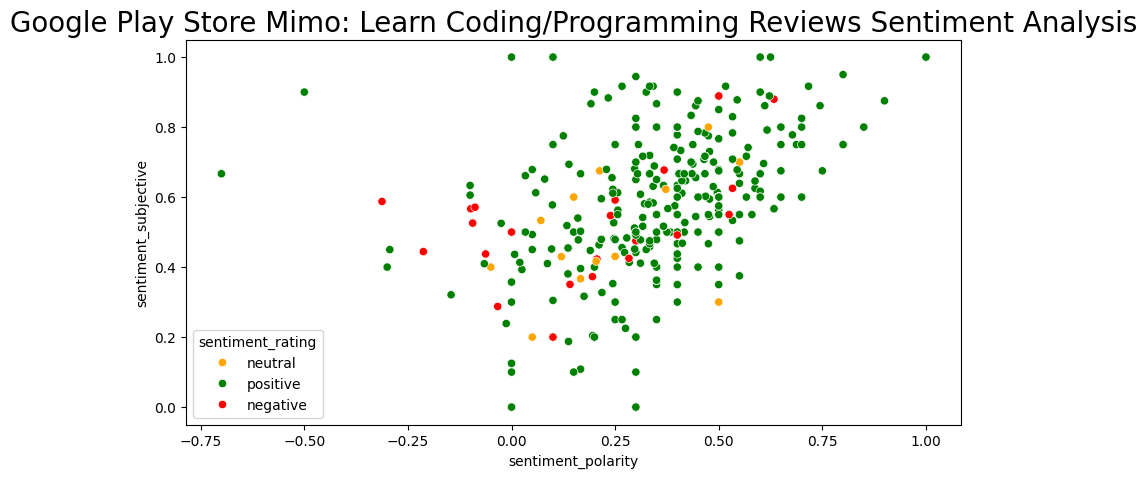

In [25]:
# Mapping warna manual untuk hue
custom_palette = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sentiment_polarity',
    y='sentiment_subjective',
    hue='sentiment_rating',
    data=df2,
    edgecolor='white',
    palette=custom_palette
)
plt.title("Google Play Store Mimo: Learn Coding/Programming Reviews Sentiment Analysis", fontsize=20)
plt.show()


In [26]:
# Hitung jumlah masing-masing kategori
rating_counts = df2['sentiment_rating'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan jumlah frekuensinya
print("📊 Jumlah Review per Kategori Berdasarkan Score:")
for sentiment, count in rating_counts.items():
    print(f"- {sentiment:<8}: {count} review")

📊 Jumlah Review per Kategori Berdasarkan Score:
- positive: 880 review
- neutral : 35 review
- negative: 55 review


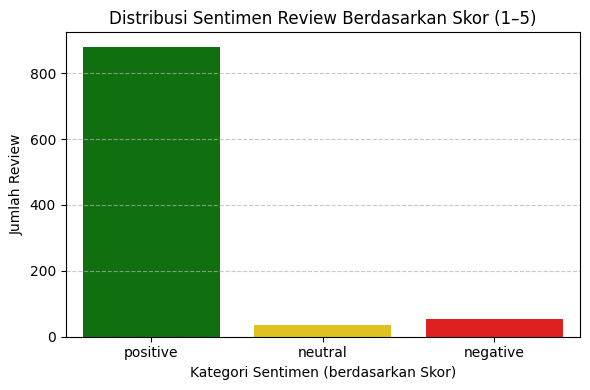

In [27]:
# Siapkan DataFrame untuk visualisasi
rating_df = rating_counts.reset_index()
rating_df.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rating_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen (berdasarkan Skor)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review Berdasarkan Skor (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

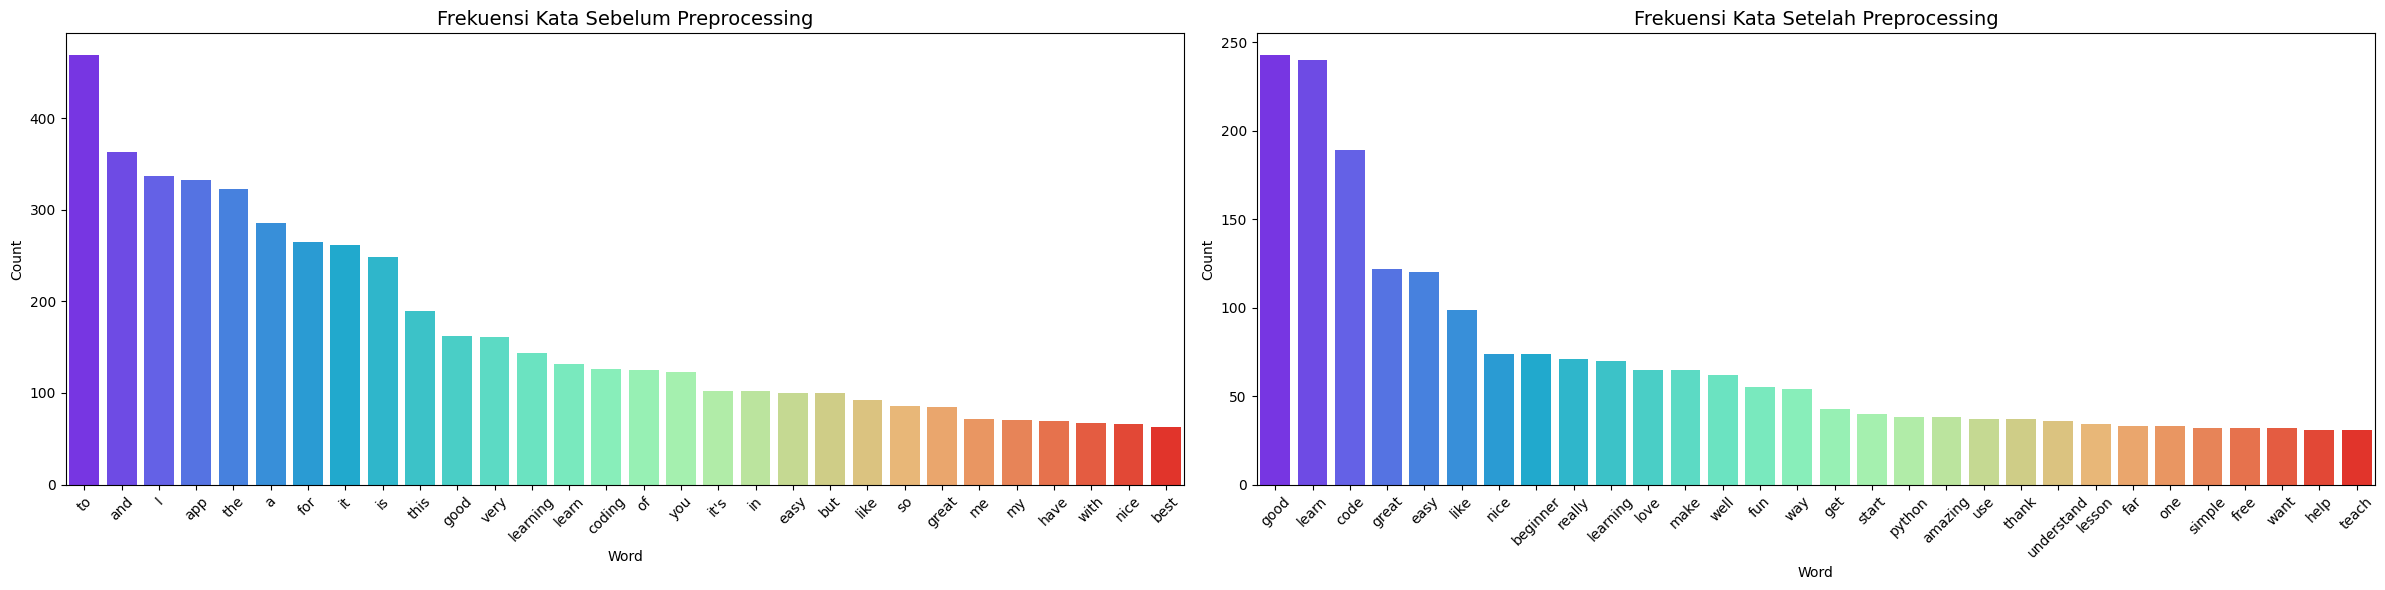

In [28]:
# Fungsi untuk visualisasi frekuensi kata
def freq_words(ax, text_series, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in text_series])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    top_words = words_df.nlargest(columns="count", n=terms)
    
    sns.barplot(data=top_words, x="word", y="count", hue="word", palette="rainbow", legend=False, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.tick_params(axis='x', rotation=45)

# Pastikan tidak ada nilai NaN
df2['content'] = df2['content'].fillna('').astype(str)

# Gabungkan token menjadi string untuk versi "after"
df2['clean_text_final'] = df2['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

# Buat 2 subplots untuk before & after
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Ganti judul tanpa emoji
freq_words(axes[0], df2['content'], title="Frekuensi Kata Sebelum Preprocessing")
freq_words(axes[1], df2['clean_text_final'], title="Frekuensi Kata Setelah Preprocessing")

plt.tight_layout()
plt.show()

### 5️⃣ **Cek Sentiment Analysis - Vader**

In [29]:
# Unduh lexicon VADER jika belum
# nltk.download('vader_lexicon')

# Inisialisasi analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [30]:
df_vader = df2[['tokens_vader']].copy()
# Gabungkan token menjadi kalimat
df_vader['text'] = df_vader['tokens_vader'].apply(lambda tokens: ' '.join(tokens))

df_vader.head(5)

,tokens_vader,text
0,"[being, using, mimo, for, quite, a, while, now...",being using mimo for quite a while now and all...
1,"[nice, aap]",nice aap
2,"[it, is, very, useful, app, i, ever, used]",it is very useful app i ever used
3,"[mimo, is, excellent💯]",mimo is excellent💯
4,"[it, is, useful, application]",it is useful application


In [31]:
# Fungsi untuk mengembalikan skor dari VADER
def get_vader_scores(text):
    return vader_analyzer.polarity_scores(text)

# Hitung skor dan ubah jadi kolom DataFrame
vader_scores = df_vader['text'].apply(get_vader_scores).apply(pd.Series)
df_vader = pd.concat([df_vader, vader_scores], axis=1)

In [32]:
# Kategorikan Sentimen
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['vader_sentiment'] = df_vader['compound'].apply(categorize_sentiment)

In [33]:
df_vader.head(5)

,tokens_vader,text,neg,neu,pos,compound,vader_sentiment
0,"[being, using, mimo, for, quite, a, while, now...",being using mimo for quite a while now and all...,0.0,1.000,0.000,0.0000,neutral
1,"[nice, aap]",nice aap,0.0,0.263,0.737,0.4215,positive
2,"[it, is, very, useful, app, i, ever, used]",it is very useful app i ever used,0.0,0.653,0.347,0.4927,positive
3,"[mimo, is, excellent💯]",mimo is excellent💯,0.0,1.000,0.000,0.0000,neutral
4,"[it, is, useful, application]",it is useful application,0.0,0.508,0.492,0.4404,positive


In [34]:
# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = df_vader['vader_sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan frekuensi
print("📊 Jumlah Review per Kategori Sentimen (VADER):")
for sentiment, count in sentiment_counts.items():
    print(f"- {sentiment.capitalize():<8}: {count} review")

📊 Jumlah Review per Kategori Sentimen (VADER):
- Positive: 864 review
- Neutral : 61 review
- Negative: 45 review


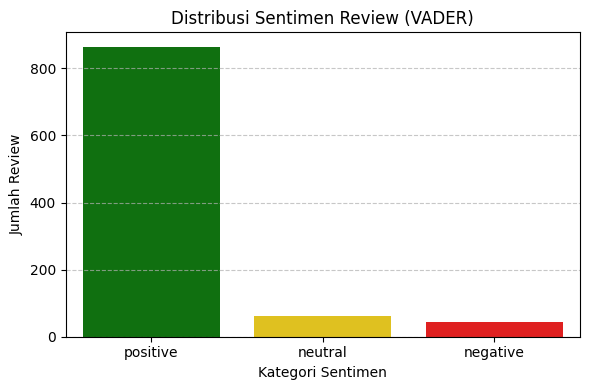

In [35]:
# Siapkan DataFrame untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Buat barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review (VADER)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
# Gabungkan kolom ke dalam satu DataFrame
df_compare = df2[['score', 'sentiment_rating']].copy()
df_compare['vader_sentiment'] = df_vader['vader_sentiment']

In [37]:
# Hitung jumlah masing-masing kombinasi kategori
compare_counts = df_compare.groupby(['sentiment_rating', 'vader_sentiment']).size().unstack(fill_value=0)
print("📊 Tabel Perbandingan Sentimen (Score vs VADER):\n")
print(compare_counts)

📊 Tabel Perbandingan Sentimen (Score vs VADER):

vader_sentiment   negative  neutral  positive
sentiment_rating                             
negative                24        4        27
neutral                  3        5        27
positive                18       52       810


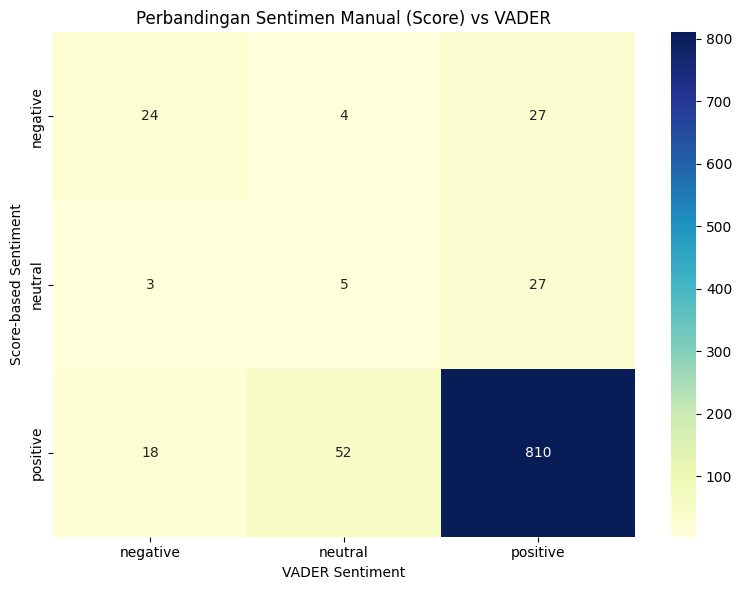

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(compare_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Perbandingan Sentimen Manual (Score) vs VADER")
plt.xlabel("VADER Sentiment")
plt.ylabel("Score-based Sentiment")
plt.tight_layout()
plt.show()

In [39]:
# Buat kolom baru untuk mengecek apakah label cocok
df_compare['sentiment_match'] = df_compare['sentiment_rating'].str.lower() == df_compare['vader_sentiment']

total_reviews = len(df_compare)
matched = df_compare['sentiment_match'].sum()
accuracy = matched / total_reviews
print(f"✅ Total review         : {total_reviews}")
print(f"✅ Jumlah yang cocok    : {matched}")
print(f"📊 Akurasi Kesesuaian   : {accuracy:.2%}")


✅ Total review         : 970
✅ Jumlah yang cocok    : 839
📊 Akurasi Kesesuaian   : 86.49%


### 6️⃣ **Topic Modelling**

In [40]:
# Buat dataset baru untuk data model
df_modelling = df2[['tokens_clean_final']].copy()
df_modelling['clean_text_final'] = df_modelling['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [41]:
df_modelling.head(5)

,tokens_clean_final,clean_text_final
0,"[quite, try, day, really]",quite try day really
1,"[nice, aap]",nice aap
2,"[useful, ever]",useful ever
3,[excellent],excellent
4,[useful],useful


In [42]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,       # Hapus kata yang terlalu umum (muncul di >95% dokumen)
    min_df=2,          # Hapus kata yang sangat langka (muncul <2 dokumen)
    ngram_range=(1, 2)  # Termasuk bigram: meningkatkan konteks topik
)

# Transformasi ke TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(df_modelling['clean_text_final'])

In [43]:
# Tentukan jumlah topik
n_topics = 5  

# Inisialisasi dan training NMF
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X_tfidf)


,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


In [44]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"\n🧠 Topik {topic_idx+1}:")
        print(", ".join(top_features))

# Panggil fungsi
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, tfidf_feature_names)


🧠 Topik 1:
good, good beginner, beginner, good learning, learning, really good, good learn, really, good code, far good

🧠 Topik 2:
nice, nice learn, pay, helpful, really, app, quite, question, aap, quiz

🧠 Topik 3:
great, great learning, great learn, learning, great beginner, beginner, tool, far, great tool, really great

🧠 Topik 4:
learn, code, easy, love, learn code, easy learn, well, like, way, fun

🧠 Topik 5:
amazing, really, beginner, use, amazing learn, helpful, keep, good beginner, app, lot


In [45]:
# Mapping topik ke label tematik (edit sesuai kebutuhan dan interpretasi manual)
topic_labels = {
    0: "Topik 1 - Pengalaman Belajar yang Baik untuk Pemula",
    1: "Topik 2 - Fitur Aplikasi & Interaktivitas Pembelajaran",
    2: "Topik 3 - Apresiasi Pengguna terhadap Mimo",
    3: "Topik 4 - Kemudahan dan Kenyamanan dalam Belajar Koding",
    4: "Topik 5 - Antusiasme Pengguna Pemula terhadap Aplikasi"
}

def display_labeled_topics(model, feature_names, topic_labels, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        label = topic_labels.get(topic_idx, f"Topik {topic_idx+1}")  # fallback jika label tidak tersedia
        print(f"\n🧠 {label}")
        print("🔑 Kata Kunci:", ", ".join(top_features))

# Panggil fungsi
display_labeled_topics(nmf_model, tfidf_feature_names, topic_labels)


🧠 Topik 1 - Pengalaman Belajar yang Baik untuk Pemula
🔑 Kata Kunci: good, good beginner, beginner, good learning, learning, really good, good learn, really, good code, far good

🧠 Topik 2 - Fitur Aplikasi & Interaktivitas Pembelajaran
🔑 Kata Kunci: nice, nice learn, pay, helpful, really, app, quite, question, aap, quiz

🧠 Topik 3 - Apresiasi Pengguna terhadap Mimo
🔑 Kata Kunci: great, great learning, great learn, learning, great beginner, beginner, tool, far, great tool, really great

🧠 Topik 4 - Kemudahan dan Kenyamanan dalam Belajar Koding
🔑 Kata Kunci: learn, code, easy, love, learn code, easy learn, well, like, way, fun

🧠 Topik 5 - Antusiasme Pengguna Pemula terhadap Aplikasi
🔑 Kata Kunci: amazing, really, beginner, use, amazing learn, helpful, keep, good beginner, app, lot


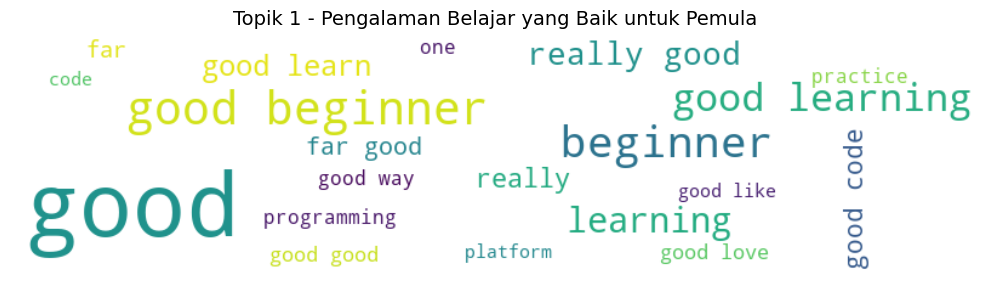

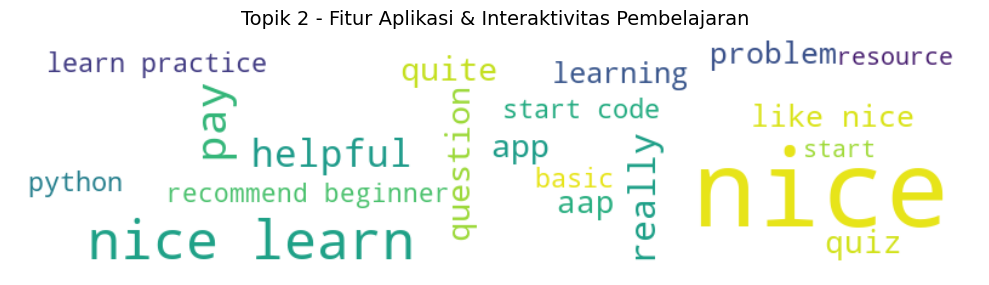

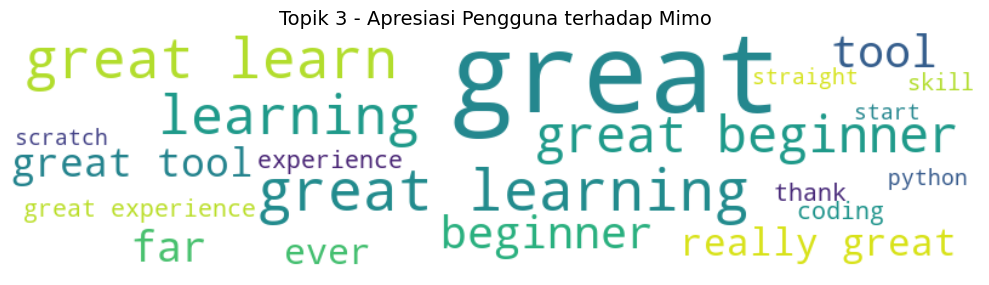

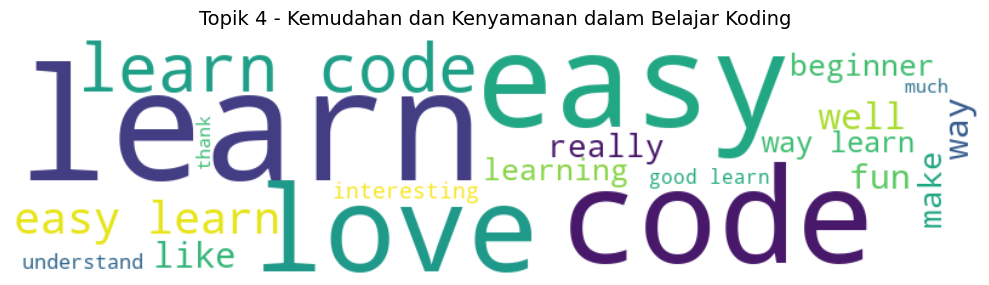

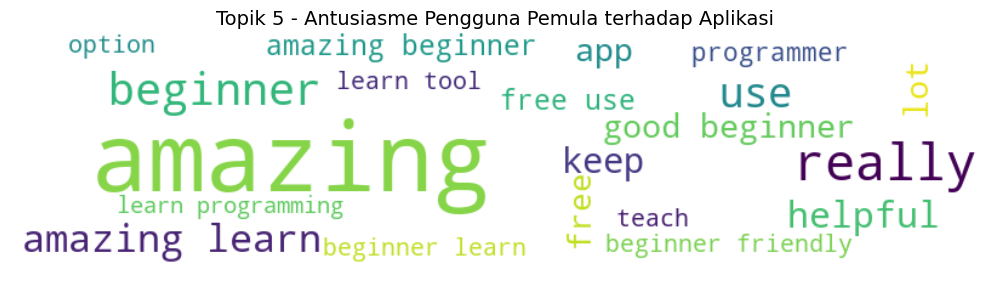

In [46]:
def plot_wordclouds_with_labels(model, feature_names, topic_labels, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        top_features = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=200, background_color='white').generate_from_frequencies(top_features)

        label = topic_labels.get(topic_idx, f"Topik {topic_idx + 1}")
        
        plt.figure(figsize=(10, 3))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{label}", fontsize=14)
        plt.tight_layout()
        plt.show()


# Jalankan visualisasi WordCloud
plot_wordclouds_with_labels(nmf_model, tfidf_feature_names, topic_labels)

In [47]:
# Dapatkan distribusi topik tiap dokumen
topic_distribution = nmf_model.transform(X_tfidf)

# Ambil topik dominan untuk setiap review
df_modelling['dominant_topic'] = topic_distribution.argmax(axis=1)

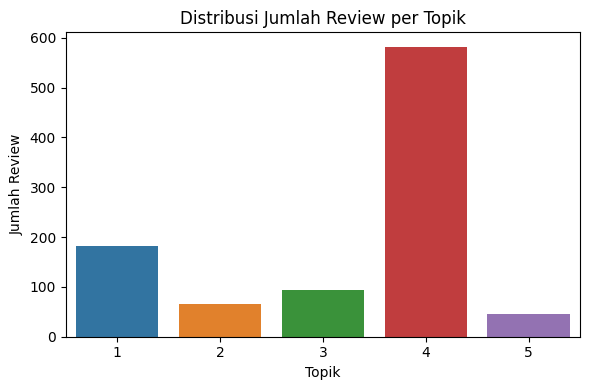

In [48]:
# Buat salinan kolom untuk ditampilkan sebagai 1-based indexing
df_modelling['dominant_topic_display'] = df_modelling['dominant_topic'] + 1

# Visualisasi distribusi topik dengan label mulai dari 1
plt.figure(figsize=(6, 4))
sns.countplot(
    x='dominant_topic_display',
    data=df_modelling,
    hue='dominant_topic_display',
    palette='tab10',
    legend=False
)
plt.title("Distribusi Jumlah Review per Topik")
plt.xlabel("Topik")
plt.ylabel("Jumlah Review")
plt.tight_layout()
plt.show()


In [49]:
df_modelling['jenis_topik'] = df_modelling['dominant_topic'].map(topic_labels) 
df_modelling.head(5)

,tokens_clean_final,clean_text_final,dominant_topic,dominant_topic_display,jenis_topik
0,"[quite, try, day, really]",quite try day really,3,4,Topik 4 - Kemudahan dan Kenyamanan dalam Belaj...
1,"[nice, aap]",nice aap,1,2,Topik 2 - Fitur Aplikasi & Interaktivitas Pemb...
2,"[useful, ever]",useful ever,3,4,Topik 4 - Kemudahan dan Kenyamanan dalam Belaj...
3,[excellent],excellent,3,4,Topik 4 - Kemudahan dan Kenyamanan dalam Belaj...
4,[useful],useful,3,4,Topik 4 - Kemudahan dan Kenyamanan dalam Belaj...


### 7️⃣ **Clustering**

In [50]:
# Buat dataset baru untuk data model
df_clustering = df2[['tokens_clean_final']].copy()
df_clustering['clean_text_final'] = df_clustering['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [51]:
df_clustering.head(5)

,tokens_clean_final,clean_text_final
0,"[quite, try, day, really]",quite try day really
1,"[nice, aap]",nice aap
2,"[useful, ever]",useful ever
3,[excellent],excellent
4,[useful],useful


In [52]:
# Vectorizer untuk clustering (gunakan unigram dulu agar stabil)
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english',
    ngram_range=(1, 1)
)

X_tfidf = tfidf_vectorizer.fit_transform(df_clustering['clean_text_final'])

In [53]:
# Tentukan jumlah cluster (misalnya 5, bisa diuji nanti)
n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(X_tfidf)

# Simpan label cluster ke DataFrame
df_clustering['cluster'] = kmeans_model.labels_

In [54]:
# Ambil nama fitur dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
def show_top_keywords_per_cluster(kmeans_model, feature_names, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil index fitur tertinggi
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        print(f"\n🔷 Cluster {cluster_num}:")
        print("   " + ", ".join(top_keywords))

# Panggil fungsi
show_top_keywords_per_cluster(kmeans_model, feature_names)


🔷 Cluster 0:
   good, beginner, learning, code, really, far, learn, like, way, love

🔷 Cluster 1:
   nice, learn, code, pay, quiz, aap, app, question, quite, learning

🔷 Cluster 2:
   learn, great, code, easy, love, like, good, amazing, fun, learning

🔷 Cluster 3:
   awesome, learn, learning, basic, code, totally, interested, try, knowledge, appreciate

🔷 Cluster 4:
   cool, pretty, coding, easy, learn, kind, duolingo, work, start, heart


In [55]:
# Mapping label deskriptif untuk tiap cluster
cluster_labels = {
    0: "Cluster 1 - Pembelajaran Dasar & Antusiasme",
    1: "Cluster 2 - Ekspresi Kecintaan & Kepuasan",
    2: "Cluster 3 - Fitur Interaktif & Alat Pembelajaran Canggih",
    3: "Cluster 4 - Fokus pada Pemula dan Proses Belajar",
    4: "Cluster 5 - Pengalaman Awal & Persepsi Pengguna Baru"
}

def show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil top-n kata per cluster
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        # Ambil label deskriptif dari mapping
        label = cluster_labels.get(cluster_num, f"Cluster {cluster_num}")
        
        print(f"\n🔷 {label}:")
        print("   " + ", ".join(top_keywords))

show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels)


🔷 Cluster 1 - Pembelajaran Dasar & Antusiasme:
   good, beginner, learning, code, really, far, learn, like, way, love

🔷 Cluster 2 - Ekspresi Kecintaan & Kepuasan:
   nice, learn, code, pay, quiz, aap, app, question, quite, learning

🔷 Cluster 3 - Fitur Interaktif & Alat Pembelajaran Canggih:
   learn, great, code, easy, love, like, good, amazing, fun, learning

🔷 Cluster 4 - Fokus pada Pemula dan Proses Belajar:
   awesome, learn, learning, basic, code, totally, interested, try, knowledge, appreciate

🔷 Cluster 5 - Pengalaman Awal & Persepsi Pengguna Baru:
   cool, pretty, coding, easy, learn, kind, duolingo, work, start, heart


In [56]:
# Reduksi dimensi
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne_model.fit_transform(X_tfidf.toarray())

# Simpan hasil TSNE ke DataFrame
df_clustering['tsne_x'] = tsne_results[:, 0]
df_clustering['tsne_y'] = tsne_results[:, 1]

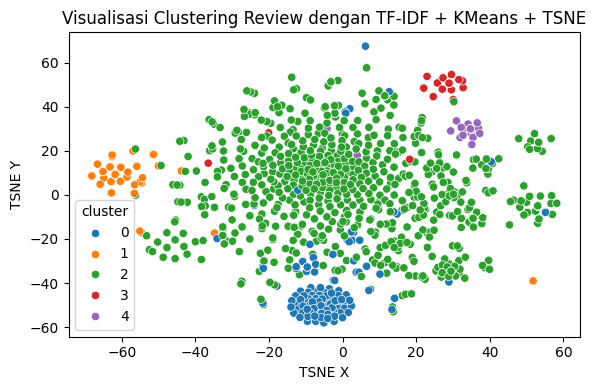

In [57]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='tsne_x', y='tsne_y',
    hue='cluster',
    data=df_clustering,
    palette='tab10',
    legend='full'
)

plt.title("Visualisasi Clustering Review dengan TF-IDF + KMeans + TSNE")
plt.xlabel("TSNE X")
plt.ylabel("TSNE Y")
plt.tight_layout()
plt.show()

In [58]:
# Buat kolom baru berdasarkan mapping
df_clustering['cluster_label'] = df_clustering['cluster'].map(cluster_labels)
df_clustering.head(5)

,tokens_clean_final,clean_text_final,cluster,tsne_x,tsne_y,cluster_label
0,"[quite, try, day, really]",quite try day really,2,-39.735165,10.837811,Cluster 3 - Fitur Interaktif & Alat Pembelajar...
1,"[nice, aap]",nice aap,1,-50.068089,13.179103,Cluster 2 - Ekspresi Kecintaan & Kepuasan
2,"[useful, ever]",useful ever,2,11.435454,44.970909,Cluster 3 - Fitur Interaktif & Alat Pembelajar...
3,[excellent],excellent,2,51.129654,24.475958,Cluster 3 - Fitur Interaktif & Alat Pembelajar...
4,[useful],useful,2,12.194739,43.177555,Cluster 3 - Fitur Interaktif & Alat Pembelajar...


### 8️⃣ **Penggabungan Data Hasil Review**

In [59]:
# Pastikan indexnya sejajar dan urutan review konsisten
df_final = pd.concat([
    df2[['content', 'score', 'sentiment_rating']].reset_index(drop=True),
    df_vader[['vader_sentiment']].reset_index(drop=True),
    df_modelling[['jenis_topik']].reset_index(drop=True),
    df_clustering[['cluster_label']].reset_index(drop=True)
], axis=1)

In [60]:
df_final.head(5)

,content,score,sentiment_rating,vader_sentiment,jenis_topik,cluster_label
0,being using mimo for quite a while now and all...,3,neutral,neutral,Topik 4 - Kemudahan dan Kenyamanan dalam Belaj...,Cluster 3 - Fitur Interaktif & Alat Pembelajar...
1,nice aap,5,positive,positive,Topik 2 - Fitur Aplikasi & Interaktivitas Pemb...,Cluster 2 - Ekspresi Kecintaan & Kepuasan
2,It is very useful app I ever used,5,positive,positive,Topik 4 - Kemudahan dan Kenyamanan dalam Belaj...,Cluster 3 - Fitur Interaktif & Alat Pembelajar...
3,Mimo is excellent💯,5,positive,neutral,Topik 4 - Kemudahan dan Kenyamanan dalam Belaj...,Cluster 3 - Fitur Interaktif & Alat Pembelajar...
4,it is useful application,5,positive,positive,Topik 4 - Kemudahan dan Kenyamanan dalam Belaj...,Cluster 3 - Fitur Interaktif & Alat Pembelajar...


In [61]:
output_path = "../data/review_final_mimo.xlsx"
df_final.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_final_mimo.xlsx
